# Softmax Regression

## Necessary Libraries

In [16]:
%pip install scikit-learn

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


# Load the data and define variables


In [17]:
# Taining and testing data
train = pd.read_csv('data/sign_mnist_train.csv')
test = pd.read_csv('data/sign_mnist_test.csv')

# Size of the images
image_width = 28
image_height = 28

## Load training data

In [18]:
# training images
X = np.array(train.drop('label', axis=1))
# training labels
y = np.array(train['label'])

# number of examples
m = len(y)

# normalize the data
# Pixel values typically range from 0 to 255.
# Dividing by 255.0 scales the data to a [0, 1] range.
# Normalization improves the performance and convergence speed of many machine learning algorithms

pixel_max_value = 255.0

X = np.array(X , dtype='float')/ pixel_max_value

# number of different labels
n_classes = len(np.unique(y))

# we get 24 instead of 26 labels because we do not have "j" and "z" samples (maybe because they are movement signals).
# in order to not get empty labels lets rename the labels
for i in range(len(y)):
    if y[i] > 8:
        y[i] -= 1

print(f'Number of training examples: {m}')
print(f'Number of features: {X.shape[1]}')
print(f'Number of classes: {n_classes}')
print(f'X_shape: {X.shape}')
print(f'y_shape: {y.shape}')


Number of training examples: 27455
Number of features: 784
Number of classes: 24
X_shape: (27455, 784)
y_shape: (27455,)


## Load Test Data

In [19]:
X_test = np.array(test.drop('label', axis=1))
y_test = np.array(test['label'])

# number of test examples
m_test = len(y_test)

pixel_max_value = 255.0

X_test = np.array(X_test , dtype='float')/ pixel_max_value

n_test_classes = len(np.unique(y_test))

for i in range(len(y_test)):
    if y_test[i] > 8:
        y_test[i] -= 1


print(f'Number of test examples: {m_test}')
print(f'X_test_shape: {X_test.shape}')
print(f'y_test_shape: {y_test.shape}')

Number of test examples: 7172
X_test_shape: (7172, 784)
y_test_shape: (7172,)


# Split training data and training evaluation data

In [20]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
print("Number of training examples: ", len(y_train))
print("X_train shape: ", X_train.shape)
print("y_train shape: ", y_train.shape)
print("Number of validation examples: ", len(y_val))
print("X_val shape: ", X_val.shape)
print("y_val shape: ", y_val.shape)

Number of training examples:  21964
X_train shape:  (21964, 784)
y_train shape:  (21964,)
Number of validation examples:  5491
X_val shape:  (5491, 784)
y_val shape:  (5491,)


# Find best hyperparameters function (Optimal C value)

In [21]:
def tune_logistic_regression_C(X_train, y_train, X_val, y_val, C_range=None, plot=True):
    """
    Tune the C hyperparameter for Logistic Regression (multinomial) using validation accuracy.

    Parameters:
        X_train (ndarray): Training features
        y_train (ndarray): Training labels
        X_val (ndarray): Validation features
        y_val (ndarray): Validation labels
        C_range (list or ndarray): List of C values to evaluate. Defaults to logspace(-4, 2, 10)
        plot (bool): If True, plot accuracy vs. C

    Returns:
        best_C (float): The C value with the highest validation accuracy
    """
    if C_range is None:
        C_range = np.logspace(-4, 2, 10)

    accuracies = []

    for C in C_range:
        model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000, C=C)
        model.fit(X_train, y_train)
        val_acc = accuracy_score(y_val, model.predict(X_val))
        accuracies.append(val_acc)
        print(f"C={C:.4f} → Validation Accuracy: {val_acc:.4f}")

    best_index = np.argmax(accuracies)
    best_C = C_range[best_index]

    if plot:
        plt.figure(figsize=(10, 6))
        plt.plot(C_range, accuracies, marker='o', color='darkorange')
        plt.xscale('log')
        plt.xlabel("C (Inverse Regularization Strength)")
        plt.ylabel("Validation Accuracy")
        plt.title("Validation Accuracy vs. C (Logistic Regression)")
        plt.grid(True)
        plt.show()

    print(f"\nBest C found: {best_C:.4f} with Validation Accuracy: {accuracies[best_index]:.4f}")
    return best_C

## Model Train

/home/rodrigoabreu/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


C=0.0001 → Validation Accuracy: 0.3413


/home/rodrigoabreu/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


C=0.0005 → Validation Accuracy: 0.5265


/home/rodrigoabreu/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


C=0.0022 → Validation Accuracy: 0.6889


/home/rodrigoabreu/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


C=0.0100 → Validation Accuracy: 0.8254


/home/rodrigoabreu/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


C=0.0464 → Validation Accuracy: 0.9414


/home/rodrigoabreu/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


C=0.2154 → Validation Accuracy: 0.9973


/home/rodrigoabreu/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


C=1.0000 → Validation Accuracy: 0.9996


/home/rodrigoabreu/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


C=4.6416 → Validation Accuracy: 0.9998


/home/rodrigoabreu/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


C=21.5443 → Validation Accuracy: 0.9993


/home/rodrigoabreu/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


C=100.0000 → Validation Accuracy: 0.9978


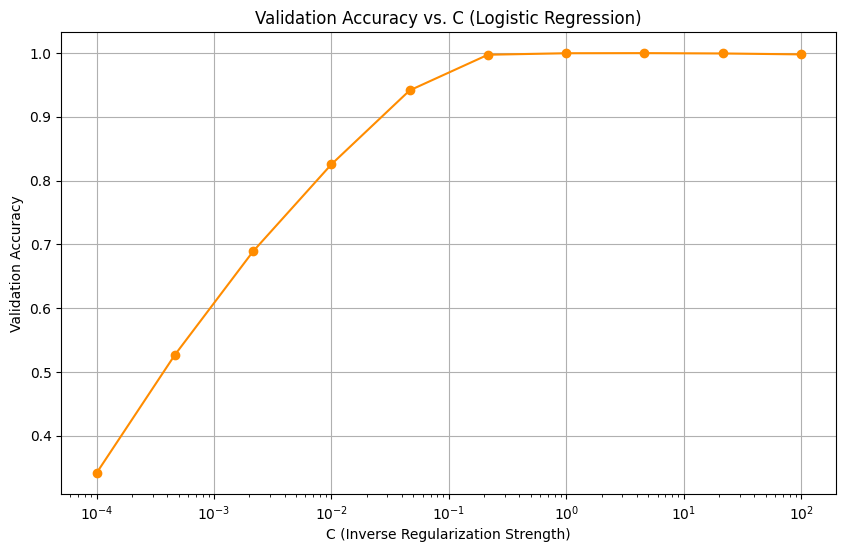


Best C found: 4.6416 with Validation Accuracy: 0.9998


/home/rodrigoabreu/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Accuracy: 0.6847462353597323

Classification Report:
               precision    recall  f1-score   support

           0       0.85      1.00      0.92       331
           1       0.96      0.91      0.93       432
           2       0.92      0.87      0.90       310
           3       0.88      0.78      0.83       245
           4       0.87      0.88      0.87       498
           5       0.67      0.91      0.78       247
           6       0.82      0.78      0.80       348
           7       0.78      0.71      0.74       436
           8       0.63      0.66      0.65       288
           9       0.61      0.39      0.47       331
          10       0.52      0.80      0.63       209
          11       0.65      0.63      0.64       394
          12       0.66      0.56      0.60       291
          13       0.98      0.66      0.79       246
          14       0.86      0.99      0.92       347
          15       0.68      0.75      0.71       164
          16       0.21    

/home/rodrigoabreu/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/home/rodrigoabreu/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/home/rodrigoabreu/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/home/rodrigoabreu/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1247: Futur

Cross-validated accuracy: 99.98%


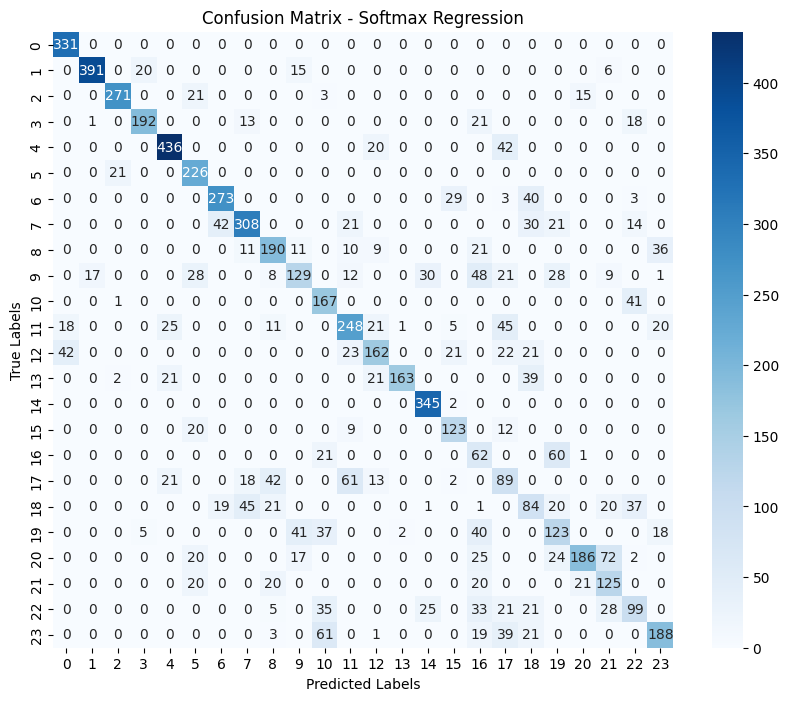

In [ ]:
best_C = tune_logistic_regression_C(X_train, y_train, X_val, y_val)

model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000, C=best_C)
model.fit(X_train, y_train)

# Predict on test data
y_pred = model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Plot confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Softmax Regression")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

Accuracy is approximately 70% and best C is 4.6416.